In [1]:
# Initial Imports
import pandas as pd
import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np

# Import S&P 500 stock ticker list
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df_stocks = table[0]
df_stocks = df_stocks.drop(columns=["Security", "GICS Sub-Industry", "Headquarters Location", "Date added", "CIK", "Founded"])

df_stocks.head()
# df_stocks.to_csv('S&P500-Info.csv')
# df_stocks.to_csv('S&P500-Symbols.csv', columns=['Symbol']['GICS Sector'])
# df_tickers = df_stocks['Symbol']['GICS Sector']
# df_tickers.head()


,Symbol,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology


In [2]:
load_dotenv()

True

In [3]:
df_stocks = df_stocks.rename(columns={
    "Symbol": "symbol"
})
df_stocks.head()

,symbol,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology


In [4]:
# Import historical price performance for S&P 500 stocks over the last 7 years
timeframe = '1Day'
start_date = pd.Timestamp('2016-06-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-04-30', tz='America/New_York').isoformat()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
   alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

tickers = df_stocks['symbol'][:500].tolist()

# tickers = df_stocks['Symbol'][101:200].tolist()

df_sp500_hist = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/bars 3 more time(s)...
sleep 3 se

In [5]:
df_sp500_hist

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-06-01 04:00:00+00:00,31.94,32.260,31.7300,31.95,6416243,42250,31.952436,AAL
2016-06-02 04:00:00+00:00,31.67,32.070,31.5799,31.67,6813295,40265,31.803351,AAL
2016-06-03 04:00:00+00:00,31.59,31.600,30.3700,30.81,12424133,67650,30.729925,AAL
2016-06-06 04:00:00+00:00,30.77,31.300,30.3800,31.26,8335439,53642,30.976306,AAL
2016-06-07 04:00:00+00:00,31.46,32.870,31.1000,32.36,12424206,72297,32.405641,AAL
...,...,...,...,...,...,...,...,...
2023-04-24 04:00:00+00:00,288.34,290.335,286.3800,288.19,244305,8898,288.013010,ZBRA
2023-04-25 04:00:00+00:00,290.34,293.480,283.9650,284.10,297760,10150,287.351108,ZBRA
2023-04-26 04:00:00+00:00,284.90,286.280,279.5900,280.42,214911,9237,282.230909,ZBRA


In [7]:
# Placing Data into CSV file
df_sp500_hist.to_csv('sp500_hist.csv', index=False)


In [8]:
# Date column Normalisation
df_sp500_hist = df_sp500_hist.reset_index()

df_sp500_hist = df_sp500_hist.rename(columns={
    "timestamp": "date"
})

#  index_col="Date", infer_datetime_format=True, parse_dates=True)

In [9]:
# Delete Unnecessary Columns

df_sp500_hist = df_sp500_hist.drop(columns=["open", "high", "low", "volume", "trade_count", "vwap"])
df_sp500_hist

,date,close,symbol
0,2016-06-01 04:00:00+00:00,31.95,AAL
1,2016-06-02 04:00:00+00:00,31.67,AAL
2,2016-06-03 04:00:00+00:00,30.81,AAL
3,2016-06-06 04:00:00+00:00,31.26,AAL
4,2016-06-07 04:00:00+00:00,32.36,AAL
...,...,...,...
854605,2023-04-24 04:00:00+00:00,288.19,ZBRA
854606,2023-04-25 04:00:00+00:00,284.10,ZBRA
854607,2023-04-26 04:00:00+00:00,280.42,ZBRA
854608,2023-04-27 04:00:00+00:00,284.12,ZBRA


In [10]:
df_sp500_hist.set_index('date', inplace=True)


In [11]:
df_sp500_hist.head()

,close,symbol
date,,
2016-06-01 04:00:00+00:00,31.95,AAL
2016-06-02 04:00:00+00:00,31.67,AAL
2016-06-03 04:00:00+00:00,30.81,AAL
2016-06-06 04:00:00+00:00,31.26,AAL
2016-06-07 04:00:00+00:00,32.36,AAL


In [12]:
df_sp500_hist['Daily Return'] = df_sp500_hist.groupby('symbol')['close'].pct_change()

In [13]:
display(df_sp500_hist.head())
display(df_sp500_hist.tail())

,close,symbol,Daily Return
date,,,
2016-06-01 04:00:00+00:00,31.95,AAL,NaN
2016-06-02 04:00:00+00:00,31.67,AAL,-0.008764
2016-06-03 04:00:00+00:00,30.81,AAL,-0.027155
2016-06-06 04:00:00+00:00,31.26,AAL,0.014606
2016-06-07 04:00:00+00:00,32.36,AAL,0.035189


,close,symbol,Daily Return
date,,,
2023-04-24 04:00:00+00:00,288.19,ZBRA,0.001007
2023-04-25 04:00:00+00:00,284.10,ZBRA,-0.014192
2023-04-26 04:00:00+00:00,280.42,ZBRA,-0.012953
2023-04-27 04:00:00+00:00,284.12,ZBRA,0.013194
2023-04-28 04:00:00+00:00,288.03,ZBRA,0.013762


In [14]:


# Calculate Daily Returns
# df_sp500_returns = df_sp500.pct_change()
# df_sp500_returns.head(100)


# Drop nulls
df_sp500_hist.isnull()
df_sp500_hist.isnull().sum()

df_sp500_hist = df_sp500_hist.dropna().copy()
df_sp500_hist

# Rename `Close` Column to be specific to this portfolio.
# df_sp500_returns = df_sp500_returns.rename(columns={
#     "close": "daily_returns"
# })

df_sp500_hist.head()



,close,symbol,Daily Return
date,,,
2016-06-02 04:00:00+00:00,31.67,AAL,-0.008764
2016-06-03 04:00:00+00:00,30.81,AAL,-0.027155
2016-06-06 04:00:00+00:00,31.26,AAL,0.014606
2016-06-07 04:00:00+00:00,32.36,AAL,0.035189
2016-06-08 04:00:00+00:00,32.51,AAL,0.004635


In [15]:
# Annualized Sharpe Ratios

## 1 sharpe_ratios = ((combined_df.mean()-combined_df['rf_rate'].mean()) * 252) / (combined_df.std() * np.sqrt(252))
##  sharpe_ratios

## 2  sharpe_ratios = (all_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
## 2 sharpe_ratios.head()

# joined_std = joined_portfolios.std()

sharpe_ratios = (df_sp500_hist.groupby('symbol')['Daily Return'].mean() * 252) / (df_sp500_hist.groupby('symbol')['Daily Return'].std() * np.sqrt(252))
df_sharpe_ratios = pd.DataFrame(sharpe_ratios)
df_sharpe_ratios.head()

,Daily Return
symbol,
A,0.701903
AAL,0.050561
AAP,0.090475
AAPL,0.513076
ABBV,0.609853


In [16]:
df_stocks.set_index('symbol', inplace=True)
df_sharpe_ratios = pd.concat([df_sharpe_ratios, df_stocks], axis = "columns", join = "inner")
df_sharpe_ratios 
# Combined_Returns = pd.concat([sp500_df, ar_df, wr_df], axis = "columns", join = "inner")

,Daily Return,GICS Sector
symbol,,
A,0.701903,Health Care
AAL,0.050561,Industrials
AAP,0.090475,Consumer Discretionary
AAPL,0.513076,Information Technology
ABBV,0.609853,Health Care
...,...,...
XOM,0.286137,Energy
XRAY,-0.020461,Health Care
XYL,0.565661,Industrials


<Axes: title={'center': 'Sharpe Ratios'}, xlabel='symbol'>

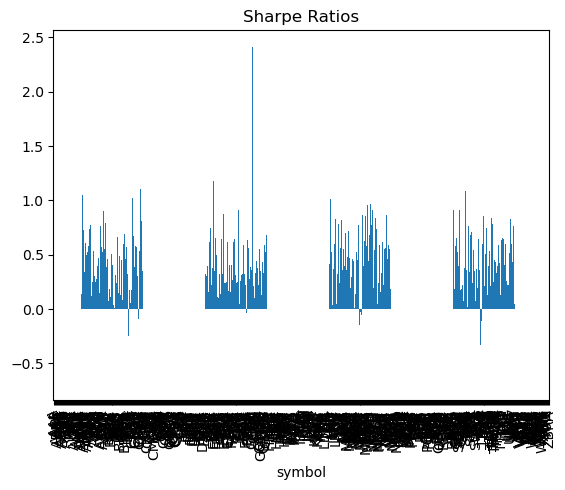

In [17]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")